https://bcimoney.xyz/

http://blog.naver.com/PostView.nhn?blogId=htblog&logNo=221510551432&parentCategoryNo=&categoryNo=99&viewDate=&isShowPopularPosts=true&from=search

https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load(image_file):
    # 해당경로의 파일을 읽어서 float 타입으로 변환합니다.
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize_with_pad(image,228,143)

    return image

In [3]:
image_1 = load("./numbers/1.jpg")
image_2 = load("./numbers/2.jpg")
image_3 = load("./numbers/3.jpg")
image_4 = load("./numbers/4.jpg")
image_5 = load("./numbers/5.jpg")
image_6 = load("./numbers/6.jpg")
image_7 = load("./numbers/7.jpg")
image_8 = load("./numbers/8.jpg")
image_9 = load("./numbers/9.jpg")

In [4]:
print(image_1.shape)
print(image_2.shape)
print(image_3.shape)
print(image_4.shape)
print(image_5.shape)
print(image_6.shape)
print(image_7.shape)
print(image_8.shape)
print(image_9.shape)

(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)


In [5]:
image_1_extension = np.expand_dims(image_1,axis=0)
image_2_extension = np.expand_dims(image_2,axis=0)
image_3_extension = np.expand_dims(image_3,axis=0)
image_4_extension = np.expand_dims(image_4,axis=0)
image_5_extension = np.expand_dims(image_5,axis=0)
image_6_extension = np.expand_dims(image_6,axis=0)
image_7_extension = np.expand_dims(image_7,axis=0)
image_8_extension = np.expand_dims(image_8,axis=0)
image_9_extension = np.expand_dims(image_9,axis=0)

In [6]:
image_array = np.concatenate((image_1_extension,image_2_extension),axis=0)
image_array = np.concatenate((image_array,image_3_extension),axis=0)
image_array = np.concatenate((image_array,image_4_extension),axis=0)
image_array = np.concatenate((image_array,image_5_extension),axis=0)
image_array = np.concatenate((image_array,image_6_extension),axis=0)
image_array = np.concatenate((image_array,image_7_extension),axis=0)
image_array = np.concatenate((image_array,image_8_extension),axis=0)
image_array = np.concatenate((image_array,image_9_extension),axis=0)

In [7]:
image_array = tf.image.resize(image_array,(54,31))

In [8]:
image_array.shape

TensorShape([9, 54, 31, 3])

In [9]:
num_classes = 9
batch_size = 1

In [10]:
label = [i for i in range(0,9)]
label = tf.one_hot(label,num_classes)

In [11]:
label

<tf.Tensor: shape=(9, 9), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((image_array,label))
train_dataset = train_dataset.shuffle(len(list(train_dataset))) # over or equal than dataset number
print(len(list(train_dataset)))
train_dataset = train_dataset.batch(batch_size)

print(train_dataset)

9
<BatchDataset shapes: ((None, 54, 31, 3), (None, 9)), types: (tf.float32, tf.float32)>


In [13]:
class Conv(tf.keras.Model):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        ## 코드 시작 ##
        self.conv = tf.keras.layers.Conv2D(filters=num_filters,kernel_size=[kernel_size, kernel_size],padding='Same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
        self.dropout = tf.keras.layers.Dropout(0.25)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv(inputs)    # self.conv forward
        x = self.bn(x)    # self.bn   forward
        x = self.relu(x)    # self.relu forward
        x = self.pool(x)    # self.pool forward
        x = self.dropout(x)
        ## 코드 종료 ##

        return x

In [14]:
class SimpleCNN(tf.keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ## 코드 시작 ##
        self.conv1 = Conv(32,5)
        self.conv2 = Conv(64,3)

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=256,activation=tf.nn.relu)
        self.dropout = tf.keras.layers.Dropout(0.25)
        self.dense2 = tf.keras.layers.Dense(units=num_classes,activation=tf.nn.softmax)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv1(inputs)    # self.conv1 forward
        x = self.conv2(x)    # self.conv2 forward
        x = self.flatten(x)    # flatten 
        x = self.dense1(x)    # self.dense1 forward
        x = self.dropout(x)
        x = self.dense2(x)    # self.dense2 forward
        ## 코드 종료 ##

        return x

In [15]:
model = SimpleCNN()
for images, labels in train_dataset.take(1):
    print(images.shape)
    outputs = model(images, training=False)
model.summary()

(1, 54, 31, 3)
Model: "simple_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv)                  multiple                  2560      
_________________________________________________________________
conv_1 (Conv)                multiple                  18752     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1491200   
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  2313      
Total params: 1,514,825
Trainable params: 1,514,633
Non-trainable params: 192
_____________________________

In [16]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss="categorical_crossentropy")

In [24]:
outputs = model.fit(train_dataset,epochs=11,verbose=1)

Train for 9 steps
Epoch 1/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0548
Epoch 2/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0163
Epoch 3/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 4/11
9/9 [==============================] - 0s 5ms/step - loss: 0.3770
Epoch 5/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 6/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 7/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 8/11
9/9 [==============================] - 0s 5ms/step - loss: 3.8360e-04
Epoch 9/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 10/11
9/9 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 11/11
9/9 [==============================] - 0s 5ms/step - loss: 1.0812e-04


In [18]:
result1 = model(image_array[0:5])

In [19]:
print(result1)

tf.Tensor(
[[2.17451140e-01 6.20511472e-01 5.32247871e-03 1.45098060e-01
  4.81443945e-03 1.99247486e-04 5.92892291e-03 6.72700815e-04
  1.50619780e-06]
 [1.95301676e-04 9.95075881e-01 1.17683121e-04 3.90034751e-03
  1.95715023e-04 1.86229972e-05 2.29271449e-04 2.65641895e-04
  1.68012809e-06]
 [1.67855958e-03 9.29363608e-01 3.95141868e-03 6.41265735e-02
  1.02277765e-04 3.27399830e-05 5.79496613e-04 1.64949684e-04
  3.12377892e-07]
 [5.90943127e-05 1.75633852e-03 2.78473326e-05 9.98148680e-01
  4.99322937e-07 5.11684959e-07 7.02538728e-06 4.65381795e-08
  1.28454414e-10]
 [2.64608907e-03 6.30557239e-01 5.75343402e-05 2.27563065e-02
  3.38787258e-01 4.34838614e-04 4.48817387e-03 2.71424244e-04
  1.10374367e-06]], shape=(5, 9), dtype=float32)


In [20]:
print(np.argmax(result1,axis=1)+1)

[2 2 2 4 2]


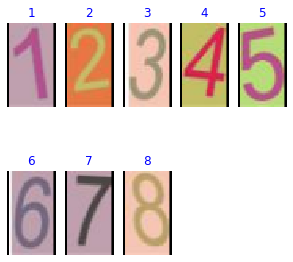

In [25]:
labels_map = {1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}

predict = model(image_array[0:-1], training=False)
real_label = [i for i in range(1,10)]

fig = plt.figure(figsize=(5, 5))
for i, (pre, label, image) in enumerate(zip(predict, real_label, image_array)):
    p = fig.add_subplot(2, 5, i+1)
    if np.argmax(pre)+1 == label:
        p.set_title("{}".format(labels_map[label]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(pre)+1],
                                   labels_map[label]), color='red')
    p.imshow(image/255)
    p.axis('off')

In [22]:
model.save_weights(os.path.join('./trained_model/my_model_bcimoneydigit'))

tf.Tensor(
[[1.24294842e-02 4.51827534e-02 4.08421300e-04 1.17866693e-05
  3.33291106e-02 8.57419509e-05 7.96295285e-01 1.12156741e-01
  1.00682169e-04]
 [1.24086179e-02 4.50152233e-02 4.08238411e-04 1.18181943e-05
  3.33719850e-02 8.56748302e-05 7.96227574e-01 1.12370238e-01
  1.00601246e-04]
 [1.20373983e-02 4.31661084e-02 4.00298333e-04 1.16593310e-05
  3.29852961e-02 8.86533089e-05 7.94405103e-01 1.16804421e-01
  1.01026315e-04]], shape=(3, 9), dtype=float32)
[7 7 7]


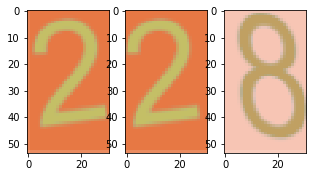

In [27]:
import pyautogui

im = pyautogui.screenshot(region=(1000,278, 105, 54))

all_number = np.array(im)

first_number = all_number[:,0:31]/255.
second_number = all_number[:,37:68]/255.
third_number = all_number[:,71:102]/255.

fig = plt.figure(figsize=(5, 5))
p = fig.add_subplot(1, 3, 1)
p.imshow(first_number)
p = fig.add_subplot(1, 3, 2)
p.imshow(second_number)
p = fig.add_subplot(1, 3, 3)
p.imshow(third_number)

first_number_extension = np.expand_dims(first_number,axis=0)
second_number_extension = np.expand_dims(second_number,axis=0)
third_number_extension = np.expand_dims(third_number,axis=0)

number_array = np.concatenate((first_number_extension,second_number_extension),axis=0)
number_array = np.concatenate((number_array,third_number_extension),axis=0)

result = model(number_array[0:3])

print(result)

print(np.argmax(result,axis=1)+1)